In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
df=pd.read_csv('processed_data.csv')
df

,Network_Technology,Launch_Announced,Launch_Status,Body_SIM,brand,model,Number of main cameras,Number of selfie cameras,Highest_maincam_res,Highest_selfiecam_res,...,PPI_Density,base_os,OS_Version,Chipset_Manufacturer,CPU_Core_Count,Card_Slot_Type,Storage,RAM,Price_EUR,year
0,GSM / HSPA / LTE,"2022, May 31","Available. Released 2022, May 31","Single SIM (Nano-SIM) or Dual SIM (Nano-SIM, d...",alcatel,1B (2022),1.0,1.0,8,5,...,293.0,Android,11,Mediatek,Quad,Microsd,32GB,2GB,100.0,2022
1,GSM / HSPA / LTE,"2021, June 25","Available. Released 2021, Q2",Single SIM (Nano-SIM) or Hybrid Dual SIM (Nano...,alcatel,1L Pro (2021),2.0,1.0,13,5,...,282.0,Android,11,Other,Octa,Microsd,32GB,2GB,110.0,2021
2,GSM / HSPA / LTE,"2021, June 25","Available. Released 2021, October 22","Single SIM (Nano-SIM) or Dual SIM (Nano-SIM, d...",alcatel,1 (2021),1.0,1.0,5,2,...,215.0,Android,11,Mediatek,Quad,Microsd,8GB,1GB,60.0,2021
3,GSM / HSPA / LTE,"2021, June 25","Available. Released 2021, October 22","Single SIM (Nano-SIM) or Dual SIM (Nano-SIM, d...",alcatel,1 (2021),1.0,1.0,5,2,...,215.0,Android,11,Mediatek,Quad,Microsd,16GB,1GB,60.0,2021
4,GSM / HSPA / LTE,"2021, January 12","Available. Released 2021, April 26","Single SIM (Nano-SIM) or Dual SIM (Nano-SIM, d...",alcatel,3L (2021),3.0,1.0,48,8,...,269.0,Android,11,Mediatek,Octa,Microsd,64GB,4GB,330.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033,GSM / HSPA,"2011, September. Released 2012, February",Discontinued,Mini-SIM,ZTE,Tania,1.0,NaN,5,NaN,...,217.0,Microsoft,Unknown,Qualcomm,NaN,No,4GB,512MB,210.0,2011
6034,CDMA / EVDO,"2011, September. Released 2011, October",Discontinued,Mini-SIM,ZTE,Warp,1.0,NaN,5,NaN,...,217.0,Android,2,Qualcomm,NaN,Microsd,4GB,512MB,NaN,2011
6035,GSM / HSPA,"2011, October. Released 2011, December",Discontinued,Mini-SIM,ZTE,Avail,1.0,NaN,5,NaN,...,165.0,Android,2,Other,NaN,Microsd,512MB,512MB,330.0,2011
6036,GSM / HSPA,"2011, February. Released 2011, Q3",Discontinued,Mini-SIM,ZTE,V9+,1.0,NaN,5,NaN,...,170.0,Android,2,Qualcomm,NaN,Microsd,4GB,512MB,NaN,2011


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6038 entries, 0 to 6037
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Network_Technology        6038 non-null   object 
 1   Launch_Announced          6038 non-null   object 
 2   Launch_Status             6038 non-null   object 
 3   Body_SIM                  6037 non-null   object 
 4   brand                     6038 non-null   object 
 5   model                     6038 non-null   object 
 6   Number of main cameras    5927 non-null   float64
 7   Number of selfie cameras  5711 non-null   float64
 8   Highest_maincam_res       5927 non-null   object 
 9   Highest_selfiecam_res     5711 non-null   object 
 10  weight                    5869 non-null   float64
 11  length                    5995 non-null   float64
 12  width                     5984 non-null   float64
 13  height                    5979 non-null   float64
 14  volume  

## Dropping null values

In [30]:
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4724 entries, 0 to 6030
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Network_Technology        4724 non-null   object 
 1   Launch_Announced          4724 non-null   object 
 2   Launch_Status             4724 non-null   object 
 3   Body_SIM                  4724 non-null   object 
 4   brand                     4724 non-null   object 
 5   model                     4724 non-null   object 
 6   Number of main cameras    4724 non-null   float64
 7   Number of selfie cameras  4724 non-null   float64
 8   Highest_maincam_res       4724 non-null   object 
 9   Highest_selfiecam_res     4724 non-null   object 
 10  weight                    4724 non-null   float64
 11  length                    4724 non-null   float64
 12  width                     4724 non-null   float64
 13  height                    4724 non-null   float64
 14  volume  

## Question number 1 : Network Technology distribution 


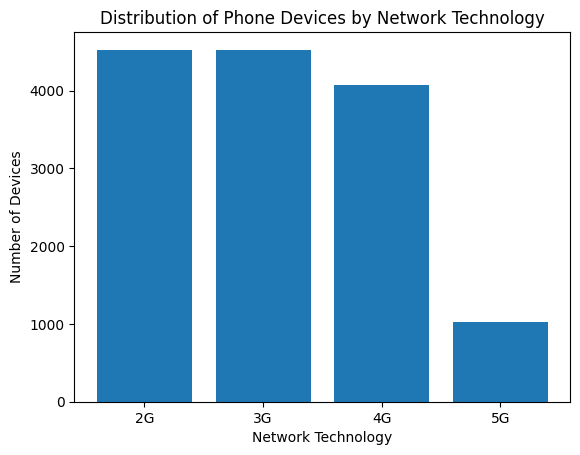

Percentage of devices supporting 2G: 95.80863674851821
Percentage of devices supporting 3G: 95.63928873835732
Percentage of devices supporting 4G: 86.11346316680779
Percentage of devices supporting 5G: 21.71888230313294


In [32]:
class PhoneDeviceAnalyzer:
    def __init__(self, data):
        self.data = data


    def calculate_tech_frequencies(self):
        freq_2g = self.data['2G'].sum()
        freq_3g = self.data['3G'].sum()
        freq_4g = self.data['4G'].sum()
        freq_5g = self.data['5G'].sum()
        frequencies = [freq_2g, freq_3g, freq_4g, freq_5g]
        return freq_2g, freq_3g, freq_4g, freq_5g, frequencies   
    
    
    def calculate_tech_percentages(self, frequencies):
        total_devices = len(self.data)
        percent_2g = (frequencies[0] / total_devices) * 100
        percent_3g = (frequencies[1] / total_devices) * 100
        percent_4g = (frequencies[2] / total_devices) * 100
        percent_5g = (frequencies[3] / total_devices) * 100
        return percent_2g, percent_3g, percent_4g, percent_5g
           

    def visualize_tech_distribution(self, frequencies):
        labels = ['2G', '3G', '4G','5G']
        plt.bar(labels, frequencies)
        plt.title('Distribution of Phone Devices by Network Technology')
        plt.xlabel('Network Technology')
        plt.ylabel('Number of Devices')
        plt.show()

    def analyze(self):
        freq_2g, freq_3g, freq_4g, freq_5g, frequencies = self.calculate_tech_frequencies()
        percentages = self.calculate_tech_percentages(frequencies)
        self.visualize_tech_distribution(frequencies)
        
        print("Percentage of devices supporting 2G:", percentages[0])
        print("Percentage of devices supporting 3G:", percentages[1])
        print("Percentage of devices supporting 4G:", percentages[2])
        print("Percentage of devices supporting 5G:", percentages[3])

        
# Creating an instance of PhoneDeviceAnalyzer
analyzer = PhoneDeviceAnalyzer(df)
analyzer.analyze()


## Question number 2:  Correlation Matrix and heatmap

In [33]:
correlation_matrix=df[['length','width','height','volume', 'weight', 'Screen_To_Body_Ratio', 'Battery_capactiy' ,'Display_Size_Cm' ,'Resolution_Pixels' ,'PPI_Density']] .corr()
correlation_matrix

,length,width,height,volume,weight,Screen_To_Body_Ratio,Battery_capactiy,Display_Size_Cm,Resolution_Pixels,PPI_Density
length,1.000000,0.951654,-0.339045,0.929780,0.963320,0.117096,0.733513,0.968386,0.374289,-0.353249
width,0.951654,1.000000,-0.295973,0.956322,0.969182,-0.072043,0.646678,0.956979,0.274086,-0.442237
height,-0.339045,-0.295973,1.000000,-0.090336,-0.219557,-0.319763,-0.290402,-0.373920,-0.429555,-0.189818
volume,0.929780,0.956322,-0.090336,1.000000,0.970884,-0.114622,0.611924,0.901845,0.197745,-0.470531
weight,0.963320,0.969182,-0.219557,0.970884,1.000000,0.019269,0.704887,0.955687,0.326731,-0.386887
Screen_To_Body_Ratio,0.117096,-0.072043,-0.319763,-0.114622,0.019269,1.000000,0.463452,0.132019,0.594774,0.480833
Battery_capactiy,0.733513,0.646678,-0.290402,0.611924,0.704887,0.463452,1.000000,0.730457,0.497461,-0.064717
Display_Size_Cm,0.968386,0.956979,-0.373920,0.901845,0.955687,0.132019,0.730457,1.000000,0.414220,-0.336847
Resolution_Pixels,0.374289,0.274086,-0.429555,0.197745,0.326731,0.594774,0.497461,0.414220,1.000000,0.683876
PPI_Density,-0.353249,-0.442237,-0.189818,-0.470531,-0.386887,0.480833,-0.064717,-0.336847,0.683876,1.000000


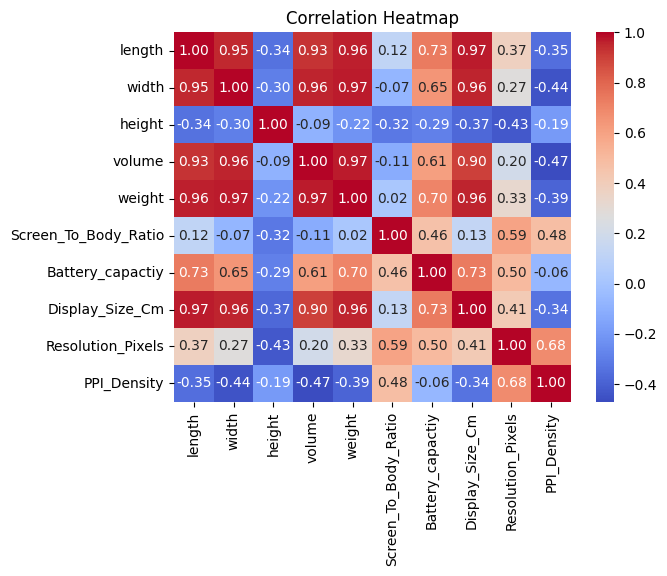

In [34]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Question number 3: SimCart types distribution

Percentage of devices with nano SIM type is : 73.20067739204065
Percentage of devices with micro SIM type is : 16.00338696020322
Percentage of devices with unknown SIM type is : 5.736663844199831
Percentage of devices with mini SIM type is : 5.0592718035563085


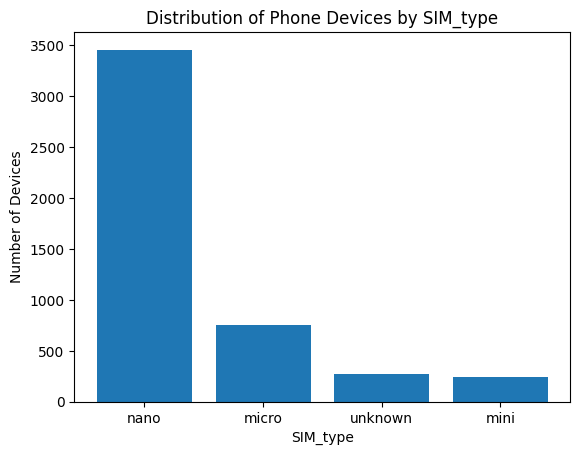

In [35]:
sim_counts=df['SIM_type'].value_counts()
total=sim_counts.sum()

for i in range(len(sim_counts.index)):
    print('Percentage of devices with',sim_counts.index[i],'SIM type is :',sim_counts.values[i]*100/total)


plt.bar(sim_counts.index, sim_counts.values)
plt.title('Distribution of Phone Devices by SIM_type')
plt.xlabel('SIM_type')
plt.ylabel('Number of Devices')
plt.show()


## Question number 4: 10 most used Android Versions

In [36]:
and_version_counts=df[df['base_os']=='Android']['OS_Version'].value_counts().head(10)
pd.DataFrame(and_version_counts)

,OS_Version
4,802
10,582
11,505
9,427
12,388
8,373
5,324
6,289
13,276
7,264


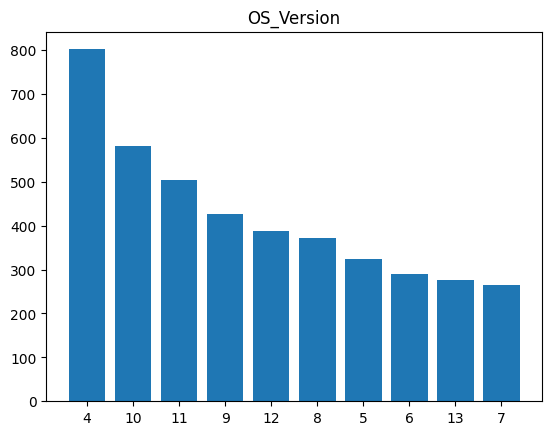

Percentage of devices with 4 Android Version is : 18.95981087470449
Percentage of devices with 10 Android Version is : 13.75886524822695
Percentage of devices with 11 Android Version is : 11.93853427895981
Percentage of devices with 9 Android Version is : 10.094562647754136
Percentage of devices with 12 Android Version is : 9.1725768321513
Percentage of devices with 8 Android Version is : 8.817966903073286
Percentage of devices with 5 Android Version is : 7.659574468085107
Percentage of devices with 6 Android Version is : 6.832151300236407
Percentage of devices with 13 Android Version is : 6.524822695035461
Percentage of devices with 7 Android Version is : 6.24113475177305


In [54]:
plt.bar(and_version_counts.index, and_version_counts.values)
plt.title('OS_Version')
plt.show()

total=and_version_counts.sum()

for i in range(len(and_version_counts.index)):
    print('Percentage of devices with',and_version_counts.index[i],'Android Version is :',and_version_counts.values[i]*100/total)

## Question number 5: 50 most Expensive phones and their OS 

In [40]:
top_50_expensive_phones = df.nlargest(50, 'Price_EUR')
top_50_expensive_phones[['model','base_os','Price_EUR']].head(10)

,model,base_os,Price_EUR
4418,Xperia Pro,Android,2000.0
1451,Mate 50 RS Porsche Design,HarmonyOS,1880.0
479,ROG Phone 8 Pro,Android,1850.7
1674,Mate 30 RS Porsche Design,Android,1700.0
1384,Mate 60 RS Ultimate,HarmonyOS,1550.0
1385,Mate 60 RS Ultimate,HarmonyOS,1550.0
5062,Mi 11 Ultra,Android,1500.0
5063,Mi 11 Ultra,Android,1500.0
5064,Mi 11 Ultra,Android,1500.0
216,iPad Pro 12.9 (2022),iPadOS,1450.0


In [42]:
df_encoded = pd.get_dummies(df[['base_os','Price_EUR']], columns=['base_os'], drop_first=True)

X = df_encoded.drop(columns=['Price_EUR'])
y = df_encoded['Price_EUR']
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_EUR   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.128
Method:                 Least Squares   F-statistic:                              87.31
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                   1.73e-135
Time:                        15:19:47   Log-Likelihood:                         -34234.
No. Observations:                4724   AIC:                                  6.848e+04
Df Residuals:                    4716   BIC:                                  6.854e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color=#ff0000>
تحلیل نتایج مدل رگرسیون برای سیستم‌عامل‌ها 
</font>
</h2>

<h2 dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>


بر اساس مدل رگرسیونی که با متغیرهای مستقل انواع سیستم‌عامل اجرا شده‌است، تمام مقادیر پی-ولیو به جز برای سیستم‌عامل‌های فایرفاکس و تیزن صفر هستند. این نکته نشان می‌دهد ضرایب رگرسیونی این مدل معنادار هستند و سیستم‌عامل، عامل تعیین‌کننده‌ای در میزان قیمت دستگاه‌هاست.
    
</font>
</h2>

In [46]:
top_50_expensive_phones = df.nlargest(50, 'Price_EUR')
top50expOS=top_50_expensive_phones['base_os'].value_counts()
pd.DataFrame(top50expOS)

,base_os
Android,36
iPadOS,10
HarmonyOS,3
iOS,1


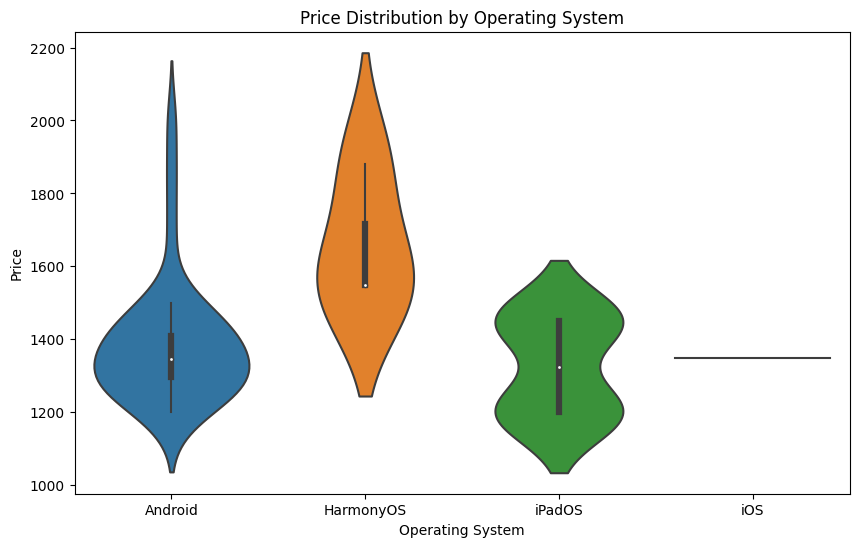

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='base_os', y='Price_EUR', data=top_50_expensive_phones)
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Price Distribution by Operating System')
plt.show()

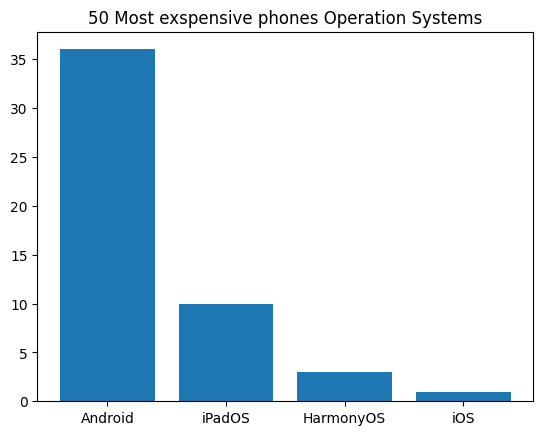

Percentage of devices with Android OS is : 72.0
Percentage of devices with iPadOS OS is : 20.0
Percentage of devices with HarmonyOS OS is : 6.0
Percentage of devices with iOS OS is : 2.0


In [52]:
plt.bar(top50expOS.index, top50expOS.values)
plt.title('50 Most exspensive phones Operation Systems')
plt.show()

total=top50expOS.sum()

for i in range(len(top50expOS.index)):
    print('Percentage of devices with',top50expOS.index[i],'OS is :',top50expOS.values[i]*100/total)

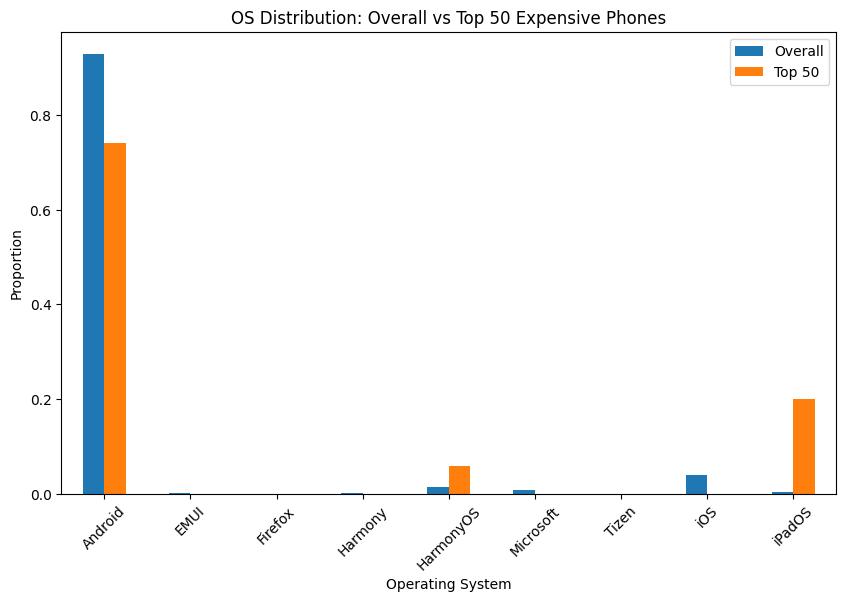

In [98]:
os_counts = df['base_os'].value_counts()
total_os_proportion = os_counts / os_counts.sum()
top_50_os_proportion = top50expOS / top50expOS.sum()

# Create a DataFrame for easier plotting
df_comparison = pd.DataFrame({'Overall': total_os_proportion, 'Top 50': top_50_os_proportion})

# Plotting
df_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('OS Distribution: Overall vs Top 50 Expensive Phones')
plt.ylabel('Proportion')
plt.xlabel('Operating System')
plt.xticks(rotation=45)
plt.show()

## Question number 6: Brands distribution

Percentage of devices with Samsung brand is : 20.935647756138867
Percentage of devices with Xiaomi brand is : 19.68670618120237
Percentage of devices with Huawei brand is : 11.11346316680779
Percentage of devices with ZTE brand is : 7.408975444538527
Percentage of devices with Lenovo brand is : 6.371718882303133
Percentage of devices with Asus brand is : 5.906011854360711
Percentage of devices with LG brand is : 5.355630821337849
Percentage of devices with Nokia brand is : 4.530059271803556
Percentage of devices with Apple brand is : 4.508890770533446
Percentage of devices with HTC brand is : 3.598645215918713
Percentage of devices with Sony brand is : 3.0906011854360713
Percentage of devices with BLU brand is : 2.9424216765453006
Percentage of devices with alcatel brand is : 2.5402201524132093
Percentage of devices with Infinix brand is : 2.011007620660457


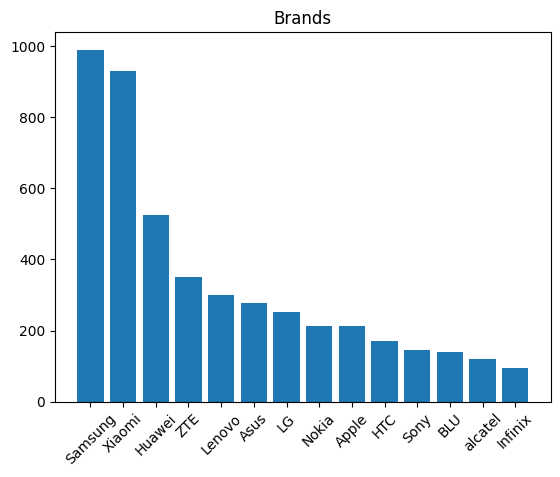

In [50]:
brand_counts=df['brand'].value_counts()

total=brand_counts.sum()

for i in range(len(brand_counts.index)):
    print('Percentage of devices with',brand_counts.index[i],'brand is :',brand_counts.values[i]*100/total)

plt.bar(brand_counts.index, brand_counts.values)
plt.title('Brands')
plt.xticks(rotation=45) 
plt.show()

## Question number 7: PPI Density trend in time in three brands: Samsung, Xiaomi, Apple

In [55]:
three_brands=df[(df['brand']=='Samsung')|(df['brand']=='Xiaomi')|(df['brand']=='Apple')]

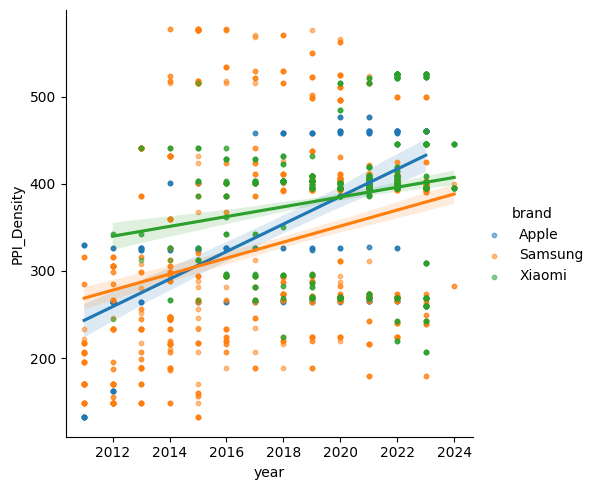

In [56]:
sns.lmplot(x='year', y='PPI_Density', hue='brand', data=three_brands, scatter_kws={'s': 10, 'alpha': 0.5},n_boot=400)

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color=#ff0000>
 تحلیل نمودار  
</font>
</h2>


<h2 dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

 خطوطی که در این نمودار بر داده‌ها فیت شده روندی صعودی دارند. این موضوع نشان می‌دهد میزان پی‌پی‌آی برای هر سه برند در طول زمان بیشتر شده‌است. شیب حطوط نشانگر این است که که این روند صعودی در برندهای متفاوت، سرعت متفاوتی داشته است. برای مثال تغییرات در برند اپل (خط آبی) شیب تندتری داشته اما در برند شیائومی تغییرات کمتری در طول زمان مشاهده می‌شود. 
    
    
    
</font>
</h2>


## Question number 8: distribution of quantitave columns

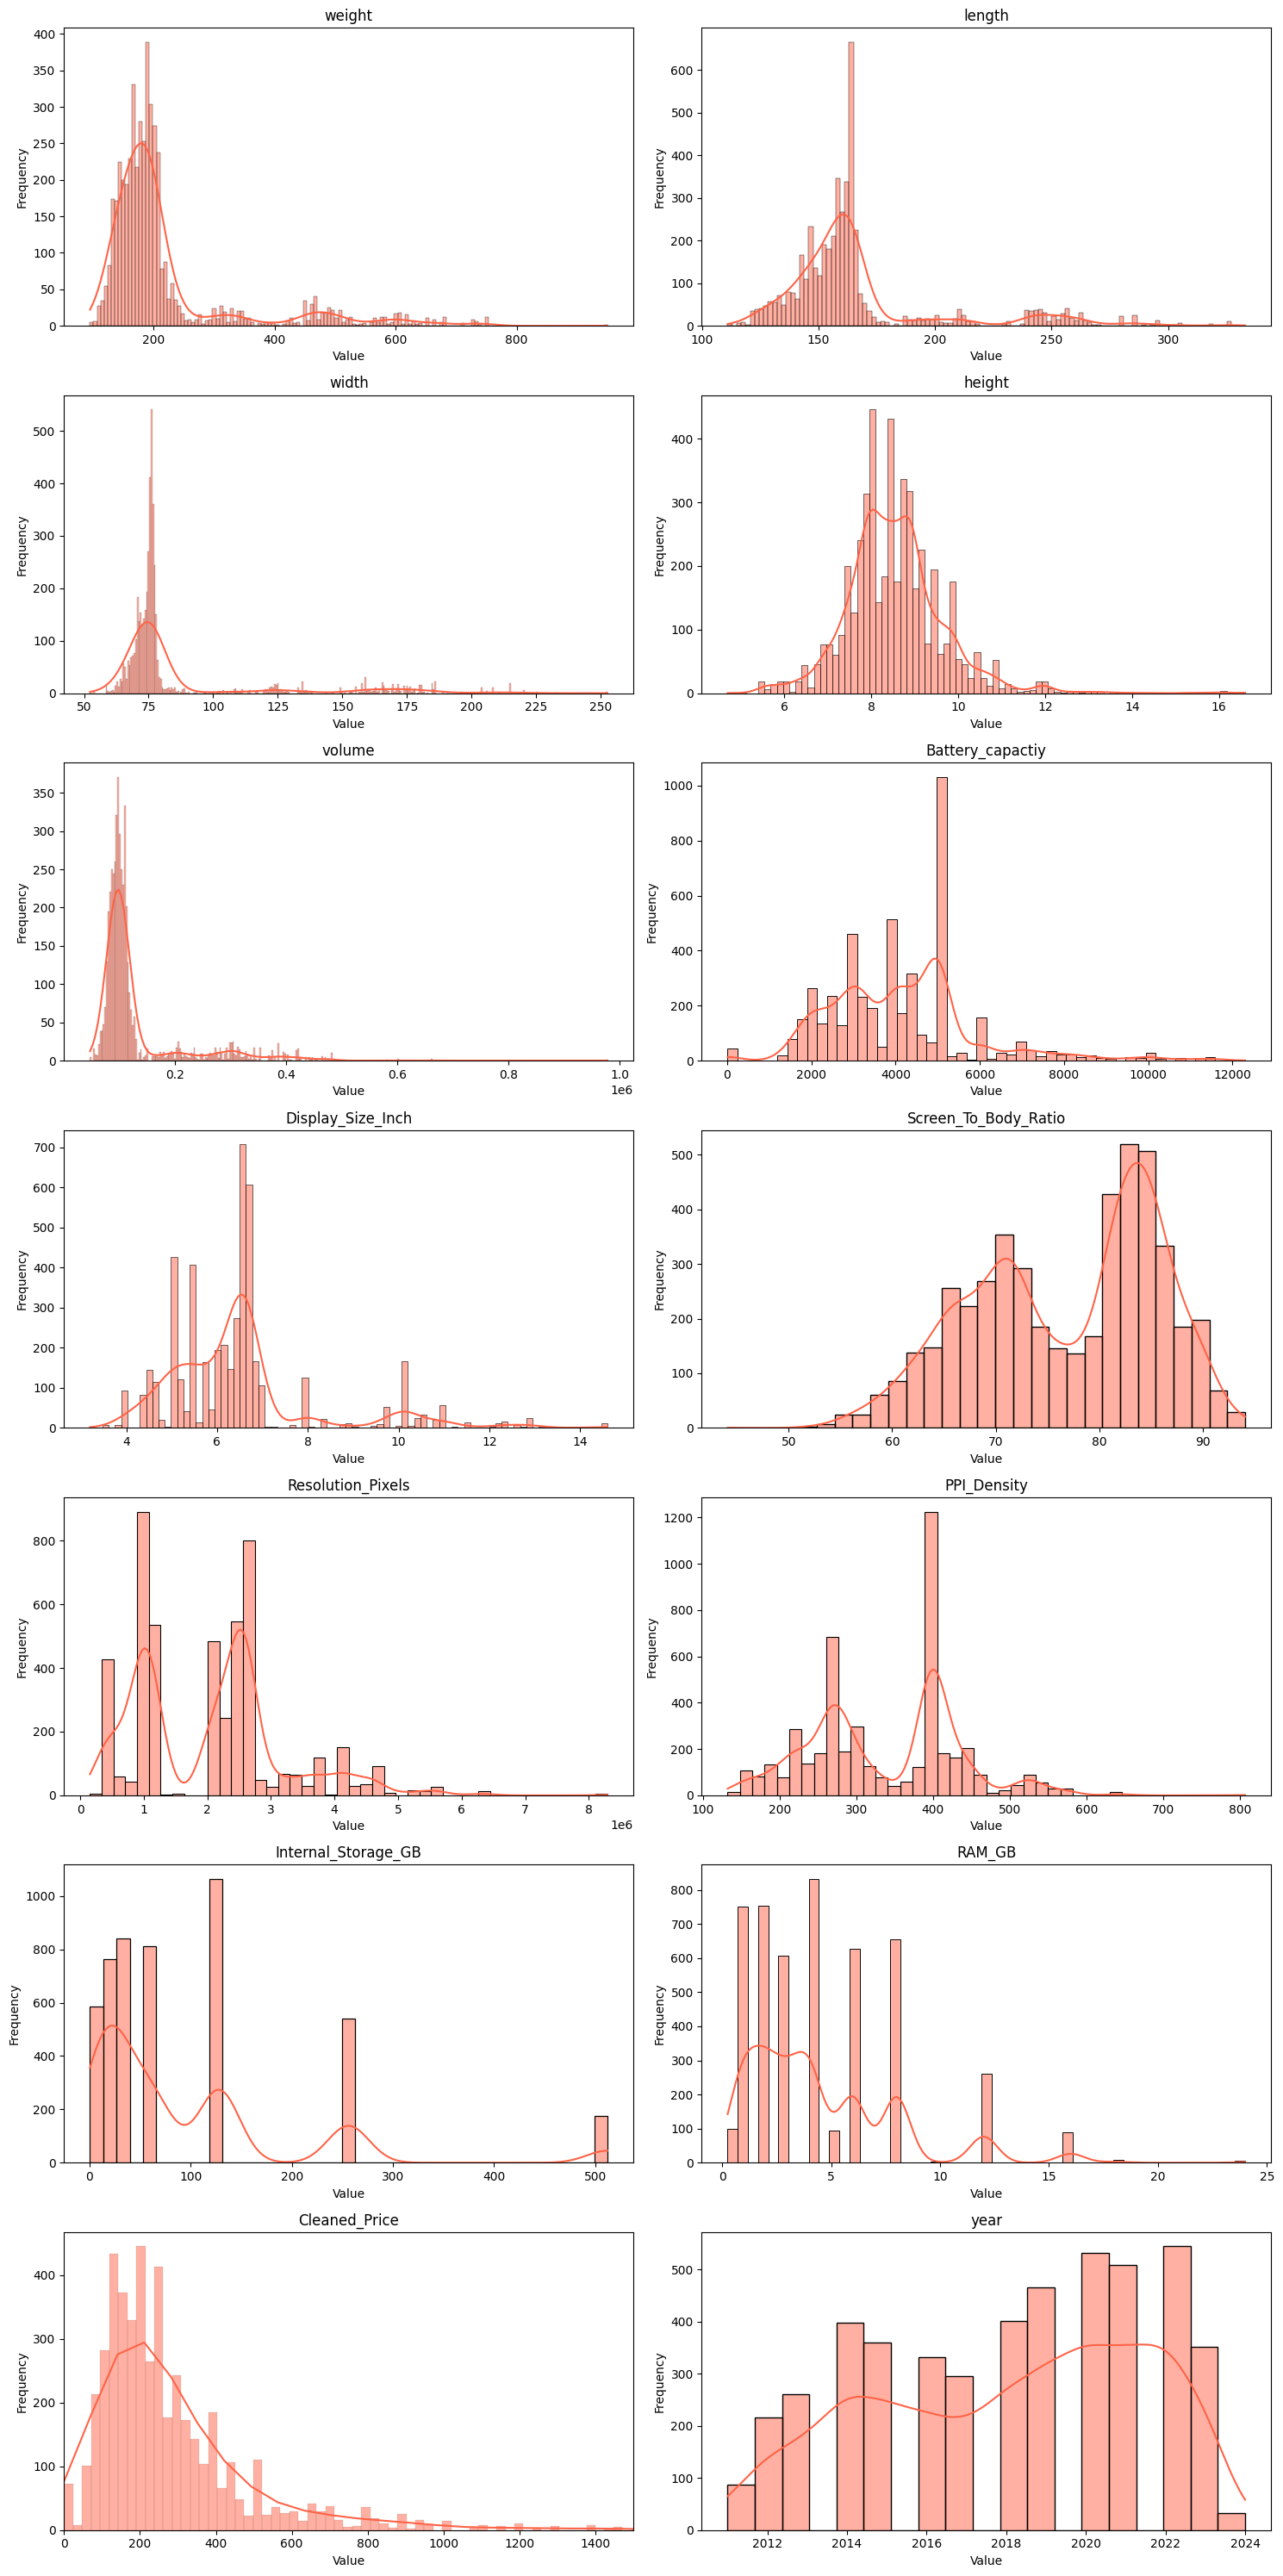

In [104]:
quant_df=df[['weight','length','width','height','volume','Battery_capactiy','Display_Size_Inch','Screen_To_Body_Ratio','Resolution_Pixels','PPI_Density','Internal_Storage_GB','RAM_GB','Cleaned_Price','year']]

fig_all , ax_all = plt.subplots(nrows=7, ncols=2,figsize=(15,30))

ax_all = ax_all.flatten()

for i, column in enumerate(quant_df.columns):
    sns.histplot(data=df, x=column, kde=True, ax=ax_all[i], color='tomato')
    ax_all[i].set_facecolor('white')
    ax_all[i].set_title(column)     
    ax_all[i].set_xlabel('Value')
    ax_all[i].set_ylabel('Frequency')


ax_all[12].set_xlim(0,1500)
plt.tight_layout()
plt.show()

## Estimation: Confidence interval for the price of 5 brands in 2023

In [58]:
five_brands = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Nokia']

selected_data = df[(df['year'] == 2023) & (df['brand'].isin(five_brands))]

selected_data['brand'].value_counts()

Xiaomi     123
Samsung     71
Huawei      29
Nokia       23
Apple       13
Name: brand, dtype: int64

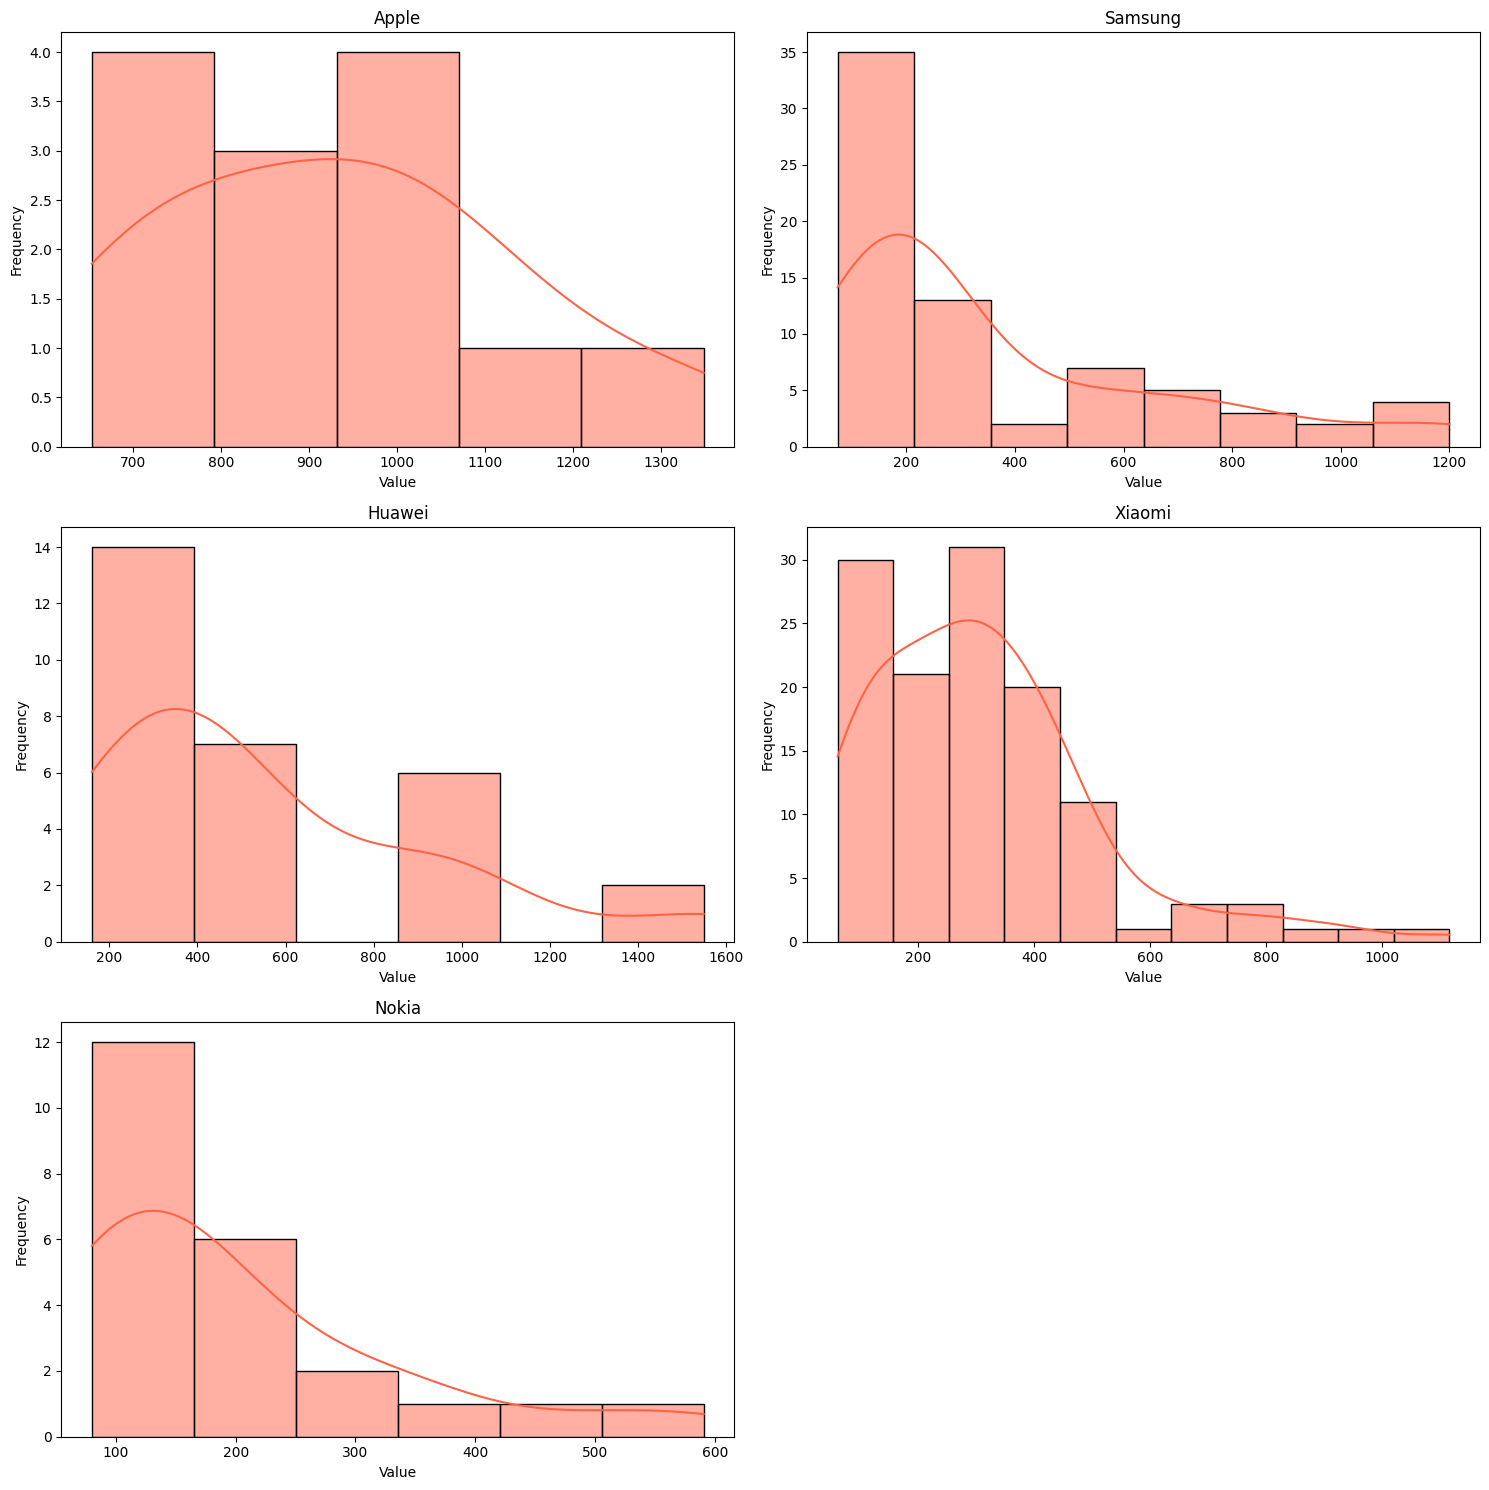

In [62]:
fig_all , ax_all = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

ax_all = ax_all.flatten()



for i, j in enumerate(five_brands):
    sns.histplot(data=selected_data[selected_data['brand'] == j]['Price_EUR'], kde=True, ax=ax_all[i], color='tomato')
    ax_all[i].set_facecolor('white')
    ax_all[i].set_title(j)     
    ax_all[i].set_xlabel('Value')
    ax_all[i].set_ylabel('Frequency')
    
    

fig_all.delaxes(ax_all[5])

    
plt.tight_layout()
plt.show()

In [64]:
alpha=0.02

sample_mean={}
sample_std={}
sample_bounds={}

for i in five_brands:
    
    sample_size=selected_data['brand'].value_counts()[i]
    
    sample_mean[i] = np.mean(selected_data[selected_data['brand']==i]['Price_EUR'])
    sample_std[i]= np.std(selected_data[selected_data['brand']==i]['Price_EUR'])
    
    t_score=stats.t.ppf(1-alpha/2,df=sample_size-1)
    
    margin_of_error= t_score * sample_std[i]/np.sqrt(sample_size)

    upperb=sample_mean[i]+ margin_of_error
    lowerb=sample_mean[i]- margin_of_error
    
    sample_bounds[i]=(lowerb,upperb)
    

    
print("Means of each brand:",sample_mean,"\n")
print("STDs of each brand:",sample_std,"\n")
print("0.98 ci for each brand:",sample_bounds,"\n")


Means of each brand: {'Apple': 934.1944692307692, 'Samsung': 371.4304408450704, 'Huawei': 559.6590344827586, 'Xiaomi': 310.04424878048775, 'Nokia': 200.23624782608698} 

STDs of each brand: {'Apple': 197.96179668635128, 'Samsung': 311.2028649337172, 'Huawei': 375.13549127477177, 'Xiaomi': 194.54691869363214, 'Nokia': 133.99647385275827} 

0.98 ci for each brand: {'Apple': (786.9950150952315, 1081.3939233663068), 'Samsung': (283.500113391896, 459.3607682982448), 'Huawei': (387.79580543755975, 731.5222635279574), 'Xiaomi': (268.6931514846396, 351.3953460763359), 'Nokia': (130.1531676067568, 270.31932804541714)} 



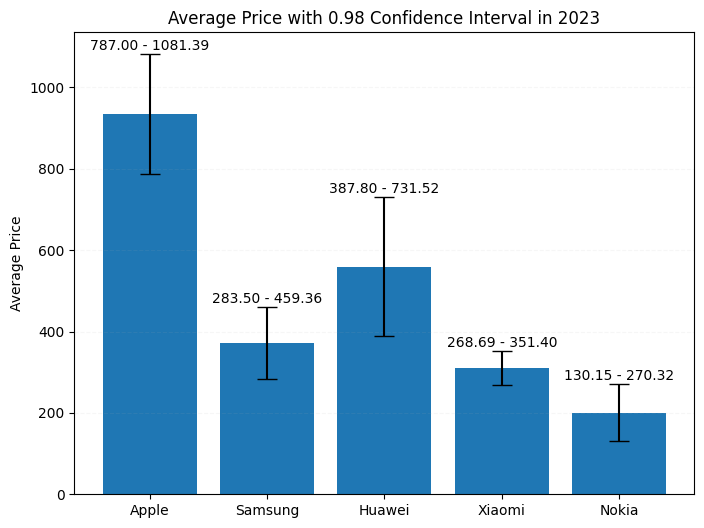

In [65]:
ci_lower, ci_upper = zip(*sample_bounds.values())

# Calculate the center of the CI (mean)
ci_center = [(lower + upper) / 2 for lower, upper in zip(ci_lower, ci_upper)]

# Calculate the error (half of the CI width)
ci_error = [(upper - lower) / 2 for lower, upper in zip(ci_lower, ci_upper)]


plt.figure(figsize=(8, 6))
plt.bar(five_brands, ci_center, yerr=ci_error, capsize=7)
plt.ylabel('Average Price')
plt.title('Average Price with 0.98 Confidence Interval in 2023')
plt.grid(axis='y', linestyle='--', alpha=0.1)

# Add labels to the error bars
for i, brand in enumerate(five_brands):
    plt.text(i, ci_center[i] + ci_error[i] + 10, f"{ci_lower[i]:.2f} - {ci_upper[i]:.2f}", ha='center')

plt.show()


In [ ]:
# num_bootstraps = 1000

# # Bootstrap resampling
# bootstrapped_means = []
# for _ in range(num_bootstraps):
#     bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
#     bootstrapped_means.append(np.mean(bootstrap_sample))

# # Calculate confidence interval
# confidence_level = 0.95
# alpha = (1 - confidence_level) / 2
# lower_percentile = 100 * alpha
# upper_percentile = 100 * (1 - alpha)

# lower_bound = np.percentile(bootstrapped_means, lower_percentile)
# upper_bound = np.percentile(bootstrapped_means, upper_percentile)

# print("Confidence interval at {} level: [{:.2f}, {:.2f}]".format(confidence_level, lower_bound, upper_bound))

## Hypothesis Testing 1: Price of devices with SIMCart types and Device Size

In [66]:
def size_classifier(x):
    if x>=7:
        size='large'
    else:
        size='Small'
    return size

df['size']=df['Display_Size_Inch'].apply(size_classifier)

C:\Users\HP\AppData\Local\Temp\ipykernel_3372\3559530725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']=df['Display_Size_Inch'].apply(size_classifier)


In [67]:
df['SIM_type'].value_counts()

nano       3458
micro       756
unknown     271
mini        239
Name: SIM_type, dtype: int64

In [68]:
three_sim_sizes=df[(df['SIM_type']=='nano')|(df['SIM_type']=='micro')|(df['SIM_type']=='mini')]

One-way ANOVA results:
                     sum_sq      df           F        PR(>F)
sim_type       8.792237e+06     2.0   92.952035  2.834215e-40
size           6.862803e+06     1.0  145.107881  6.584128e-33
sim_type:size  8.881470e+05     2.0    9.389541  8.526288e-05
Residual       2.103186e+08  4447.0         NaN           NaN


(0.0, 1000.0)

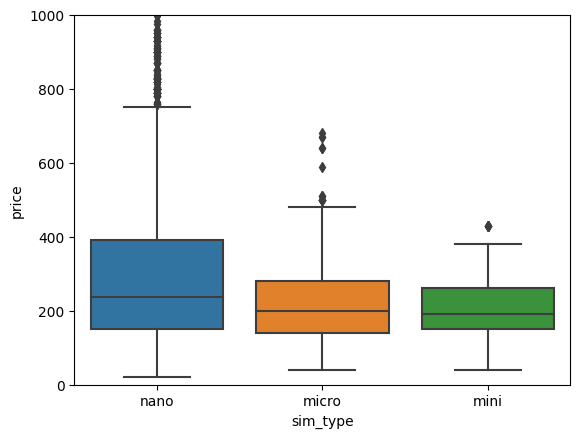

In [69]:
OTANOVA ={"price": three_sim_sizes['Price_EUR'], "sim_type":three_sim_sizes['SIM_type'],"size":three_sim_sizes['size']}
OTANOVA =  pd.DataFrame(OTANOVA)
model = ols('price ~ sim_type * size', data=OTANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

ax=sns.boxplot(x='sim_type', y='price',data=OTANOVA)
ax.set_ylim([0, 1000])
#ax.legend(loc='upper left')


<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b>نتیجه تحلیل آنوا</b>
</font>
</h2>


Null Hypotheses:

H₀ for "sim_type": There is no significant difference in the means of the response variable (price) across different categories.

H₀ for "size": There is no significant difference in the means of the response variable (price) between different discount levels.

H₀ for Interaction effect: There is no significant interaction effect between "sim_type" and "size" on the response variable (price).



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium; color:#ff0000"">
<font face="vazir" size=3 color="#ff0000">
با توجه به میزان نتیجه اِف و پی-ولیو‌های کمتر از پنج صدم در هر سه مورد (نوع سیمکارت و سایز) می‌توان گفت که فرض صفر (یعنی عدم وجود تفاوت معنادار بین میانگین میان گروه‌ها) رد می‌شود. به عبارت دیگر می‌توان گفت نوع سیم‌کارت در هر دو گروه سایز کوچک و بزرگ بر قیمت اثر دارد. 
</font>
<p>  
                                         
                         

# building a class for t-test and u-test Hypothesis testing: 

In [80]:
import matplotlib.pyplot as plt

class Hypothesis_testing:
    def __init__(self, data, dep_var, ind_var):
        self.data = data
        self.dep_var = dep_var
        self.ind_var = ind_var
                
    def separate_groups(self):
        categories = self.data[self.ind_var].unique()
        groups = {}        
        for category in categories:
            var_name = f"{category.lower()}_phones_{self.dep_var}"
            filtered_data = self.data[self.data[self.ind_var] == category][self.dep_var]
            groups[var_name] = filtered_data        
        return groups
    
    def normality_test(self,groups):       
        normality_p_values={}       
        for group_name, group_data in groups.items():
            normal_test_stat, normal_p_value = sp.stats.shapiro(group_data)
            normality_p_values[group_name]=normal_p_value           
        return normality_p_values                         
    
    def visualize(self, groups):        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))        
        for ax, (group_name, group_data) in zip(axes, groups.items()):
            ax.hist(group_data, label=group_name,bins=30, color='blue')
            ax.set_title(group_name)            
        plt.tight_layout()
            
    
    def bc_transform(self,groups):
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))        
        bc_normality_p_values={}
        
        for ax, (group_name, group_data) in zip(axes, groups.items()):        
            boxcox_data, lambda_boxcox = stats.boxcox(group_data)  
            normal_test_stat, normal_p_value = sp.stats.shapiro(boxcox_data)
            ax.hist(boxcox_data, label=group_name ,bins=30, color='green')
            ax.set_title(f"{group_name}_boxcox")            
            bc_normality_p_values[group_name]=normal_p_value
                        
        return bc_normality_p_values                       
   
    def perform_t_test(self, group_a_data, group_b_data):       
        t_stat, p_value = stats.ttest_ind(group_a_data, group_b_data) 
        
        print('t_statistics:',t_stat,'p_value:',p_value,'\n')
        
        if p_value < 0.05:
            print("Reject null hypothesis: Means are significantly different. \n")
        else:
            print("Fail to reject null hypothesis: No significant difference in means. \n")
        
    def perform_mannwhitneyu_test(self, group_a_data, group_b_data):       
        u_stat, p_value = stats.mannwhitneyu(group_a_data, group_b_data)
        
        print('u_statistics:',u_stat,'p_value:',p_value,'\n')
        
        if p_value < 0.05:
            print("Reject null hypothesis: Distributions are significantly different.\n")
        else:
            print("Fail to reject null hypothesis: No significant difference in distributions.\n")

    def perform_hypothesis_test(self):        
        groups = self.separate_groups()
        normality_p_values = self.normality_test(groups)
        group_names = list(groups.keys())
        group_a_name = group_names[0]
        group_b_name = group_names[1]
        group_a_data = groups[group_a_name]
        group_b_data = groups[group_b_name]
               
        self.visualize(groups)
        
        if normality_p_values[group_a_name] > 0.05 and normality_p_values[group_b_name] > 0.05:            
            print('Data is normal, performing T-test on data \n')        
            self.perform_t_test(group_a_data, group_b_data)
            
        else:      
            print(f"{group_a_name} and/or {group_b_name}: Based on normality test this data is not normal. performing U-test on data: \n")
            
            self.perform_mannwhitneyu_test(group_a_data, group_b_data)
            
            print(f"{group_a_name} and/or {group_b_name}: Trying Boxcox transformation... \n")
                      
            bc_normality_p_values=self. bc_transform(groups) 
            bc_group_a_data=groups[group_a_name]
            bc_group_b_data=groups[group_b_name]
            
                        
            print('performing t-test on boxcox transformed data to check the u-test validity \n')
            self.perform_t_test(bc_group_a_data, bc_group_b_data)
            


## Hypothesis Testing 2: PPI density among Small and Large devices

small_phones_PPI_Density and/or large_phones_PPI_Density: Based on normality test this data is not normal. performing U-test on data: 

u_statistics: 2696128.0 p_value: 1.9835879564422188e-248 

Reject null hypothesis: Distributions are significantly different.

small_phones_PPI_Density and/or large_phones_PPI_Density: Trying Boxcox transformation... 

performing t-test on boxcox transformed data to check the u-test validity 

t_statistics: 38.87564975052125 p_value: 4.4850938077828535e-287 

Reject null hypothesis: Means are significantly different. 



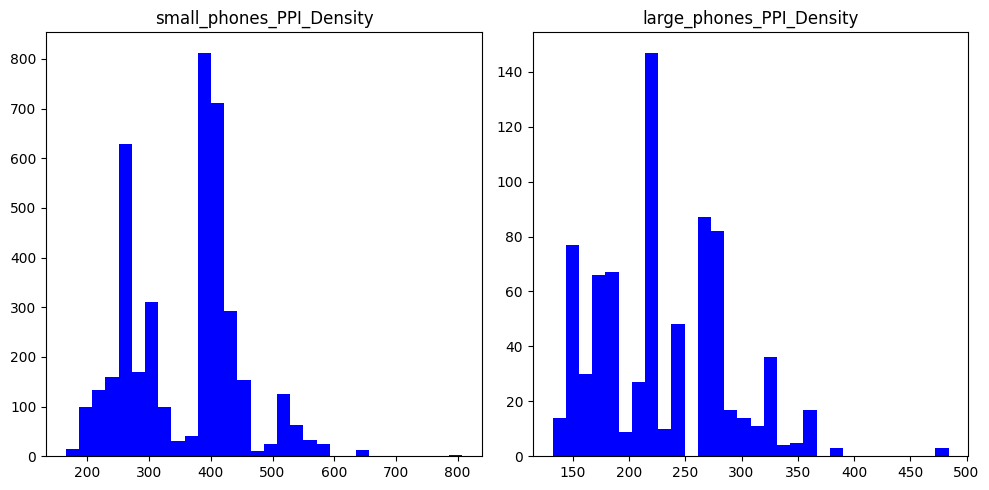

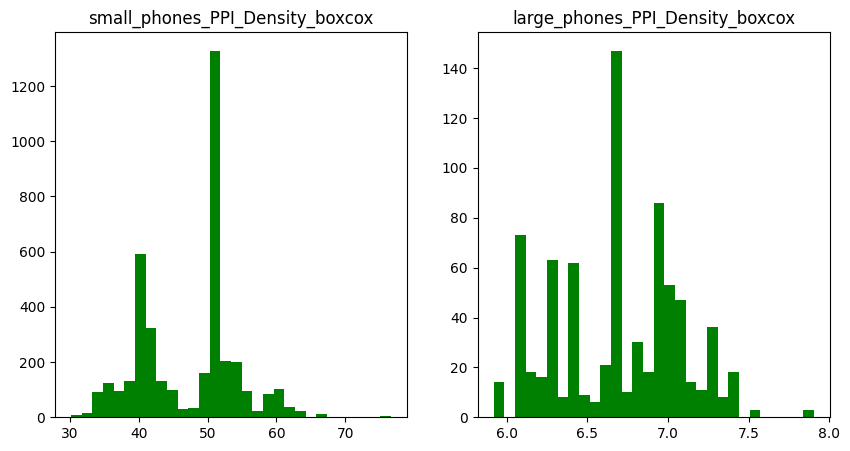

In [81]:
# Assuming you have a valid DataFrame 'df'
analyzer = Hypothesis_testing(df, 'PPI_Density', 'size')
analyzer.perform_hypothesis_test()

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b> تحلیل نتیجه تست فرض  </b>
</font>
</h2>


Ho: M(PPi density for small devices) = M(PPi density for large devices)

H1: M(PPi density for small devices) < M(PPi density for large devices) or M(PPi density for small devices) > M(PPi density for large devices)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
      در این تست فرض،‌ ابتدا نرمال بودن داده‌ها توسط تست نرمالیتی شاپیرو بررسی شد. بر ااساس نمودار توزیع داده‌ها و اجرای تست نرمالیتی مشخص می‌شود این داده نرمال نیست. بنابراین نمی‌توانیم تی-تست بگیریم. یو -تست اجرا شده و نتیجه نشان می‌دهد مقدار پی-ولیو از آلفای پنج‌صدم کمتر است. بنابراین فرض صفر یعنی برابری میانگین پی‌پی‌آی در گوش‌های با سایز متفاوت رد می‌شود. 
    از آنجا که داده نرمال نبوده‌است، کلاس تست‌فرض ترنسفرم باکس‌کاکس را هم بر روی داده اجرا می‌کند و با داده به دست آمده از این ترنسفرم تی-تست هم انجام می‌دهد تا نتیجه یو-تست را چک کنیم. نتیجه تی-تست بر داده‌های ترنسفرم شده هم نتیجه یو-تست قبلی را تایید می‌کنند.     
    بنابراین می‌توان گفت گوشی‌های با سایز متفاوت میزان پی‌پی آی متقاوتی دارند. جهت این تفاوت را در نمودار باکس‌پلات زیر می‌توان مشاهده کرد: 
    این نمودار نشان می‌دهد میانگین پی‌پی‌آی برای گوشی‌های کوچکتر بزرگتر است.     
</font>  
<p>
    
------------------------------------------------------------------------------------------------------------------------

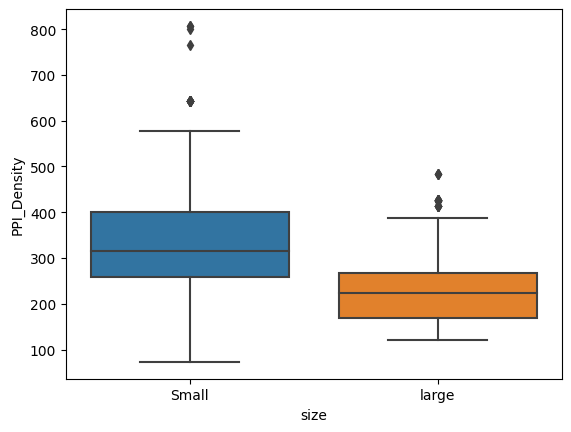

In [210]:
ax=sns.boxplot(x=filtered_df['size'],y=filtered_df['PPI_Density'])

## Hypothesis Testing 3: Weight among Android and iOS devices

In [82]:
selected_os=df[(df['base_os']=='Android')|(df['base_os']=='iOS')]

android_phones_weight and/or ios_phones_weight: Based on normality test this data is not normal. performing U-test on data: 

u_statistics: 323530.5 p_value: 1.0353302113791687e-07 

Reject null hypothesis: Distributions are significantly different.

android_phones_weight and/or ios_phones_weight: Trying Boxcox transformation... 

performing t-test on boxcox transformed data to check the u-test validity 

t_statistics: -9.493652385229467 p_value: 3.492079977254957e-21 

Reject null hypothesis: Means are significantly different. 



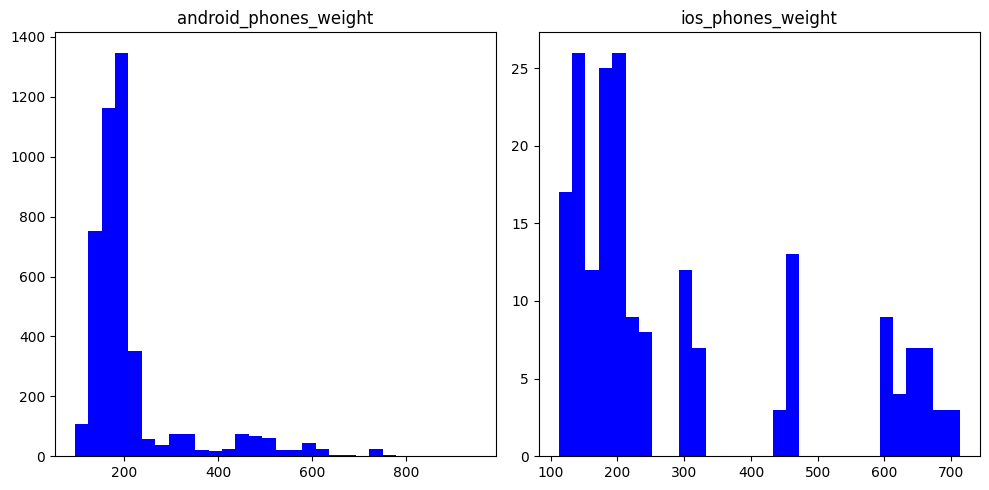

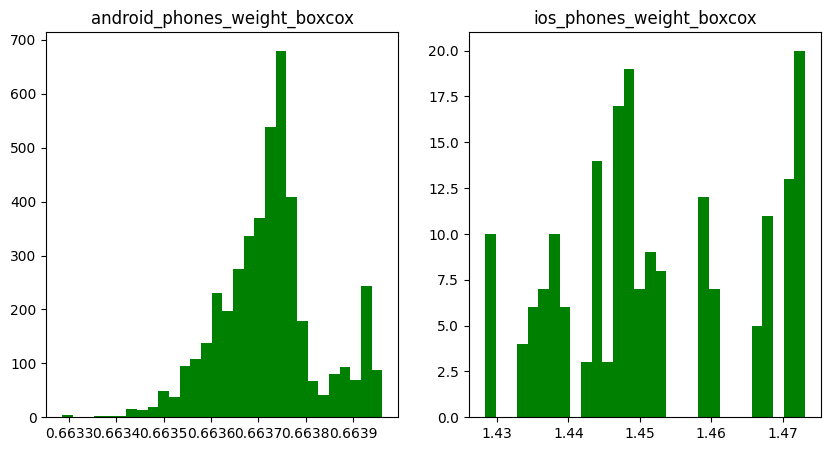

In [83]:
analyzer = Hypothesis_testing(selected_os, 'weight', 'base_os')
analyzer.perform_hypothesis_test()

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b> تحلیل نتیجه تست فرض  </b>
</font>
</h2>


Ho: M(Weight for iOS devices) = M(Weight for Android devices)

H1: M(Weight for iOS devices) < M(Weight for Android devices) or M(Weight for iOS devices) > M(Weight for Android devices)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تست فرض،‌ ابتدا نرمال بودن داده‌ها توسط تست نرمالیتی شاپیرو بررسی شد. بر اساس نمودار توزیع داده‌ها و اجرای تست نرمالیتی مشخص می‌شود این داده هم نرمال نیست. بنابراین نمی‌توانیم تی-تست بگیریم. یو -تست اجرا شده و نتیجه نشان می‌دهد مقدار پی-ولیو از آلفای پنج‌صدم کمتر است. بنابراین فرض صفر یعنی برابری میانگین وزن در گوشیهای با سیستم‌عامل متفاوت رد می‌شود. از آنجا که داده نرمال نبوده‌است، کلاس تست‌فرض ترنسفرم باکس‌کاکس را هم بر روی داده اجرا می‌کند و با داده به دست آمده از این ترنسفرم تی-تست هم انجام می‌دهد تا نتیجه یو-تست را چک کنیم. نتیجه تی-تست بر داده‌های ترنسفرم شده هم نتیجه یو-تست قبلی را تایید می‌کنند. بنابراین می‌توان گفت گوشی‌های با سیستم‌عامل متفاوت میانگین وزن متقاوتی دارند. جهت این تفاوت را در نمودار باکس‌پلات زیر می‌توان مشاهده کرد: این نمودار نشان می‌دهد میانگین وزن برای گوشی‌های با سیستم عامل آی-او-اس بیشتر است.
</font>  
<p>
    
------------------------------------------------------------------------------------------------------------------------

(0.0, 750.0)

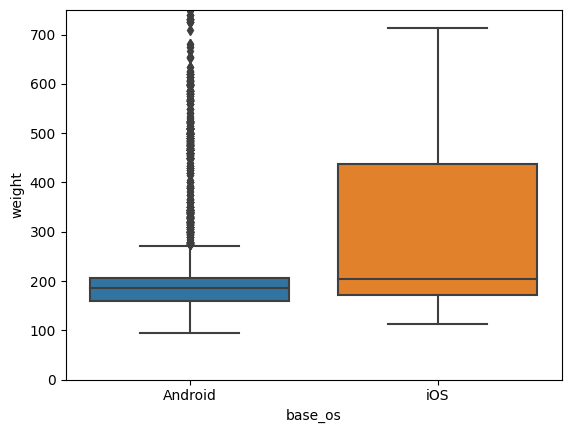

In [85]:
os_selected_data=df[(df['base_os']=='Android')|(df['base_os']=='iOS')]
ax=sns.boxplot(x=os_selected_data['base_os'],y=os_selected_data['weight'])
ax.set_ylim([0, 750])

## Hypothesis Testing 4: Battery Capacity of different sizes among three selected brands 

In [86]:
three_brands=df[(df['brand']=='Samsung')|(df['brand']=='Xiaomi')|(df['brand']=='Apple')]

(array([ 10.,   0.,  43., 118., 116., 245., 232., 297., 721.,  33.,  89.,
         31.,  56.,  22.,  31.,  13.,  20.,  21.,  10.,  24.]),
 array([1.00000e+01, 5.87500e+02, 1.16500e+03, 1.74250e+03, 2.32000e+03,
        2.89750e+03, 3.47500e+03, 4.05250e+03, 4.63000e+03, 5.20750e+03,
        5.78500e+03, 6.36250e+03, 6.94000e+03, 7.51750e+03, 8.09500e+03,
        8.67250e+03, 9.25000e+03, 9.82750e+03, 1.04050e+04, 1.09825e+04,
        1.15600e+04]),
 <BarContainer object of 20 artists>)

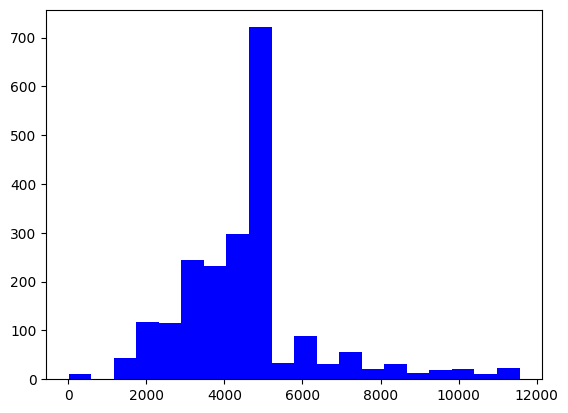

In [87]:
plt.hist( three_brands['Battery_capactiy'], bins=20, label='Battery_capactiy', color='blue')

Two-way ANOVA results:
                  sum_sq      df            F         PR(>F)
brand       4.019298e+08     2.0   112.543756   3.475496e-47
size        2.900435e+09     1.0  1624.292846  2.443423e-264
brand:size  1.381723e+08     2.0    38.689410   3.132980e-17
Residual    3.796314e+09  2126.0          NaN            NaN


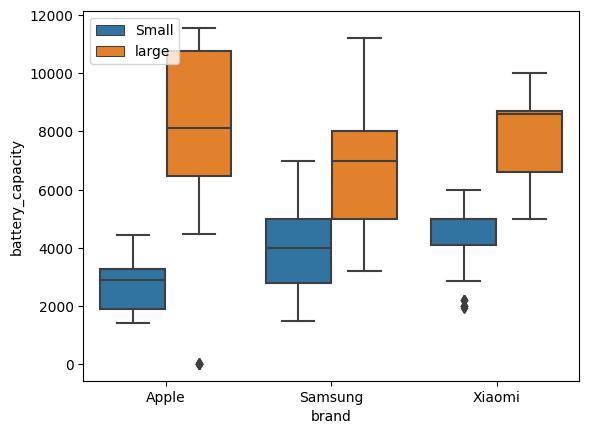

In [88]:
OTANOVA ={"battery_capacity": three_brands['Battery_capactiy'], "brand":three_brands['brand'], "size":three_brands['size']}
OTANOVA =  pd.DataFrame(OTANOVA)
model = ols('battery_capacity ~ brand * size', data=OTANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-way ANOVA results:")
print(anova_table)

ax=sns.boxplot(x='brand', y='battery_capacity', hue='size', data=OTANOVA)
ax.legend(loc='upper left')


<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b>نتیجه تحلیل آنوا</b>
</font>
</h2>


Null Hypotheses:

H₀ for "brand": There is no significant difference in the means of the response variable (battery_capacity) across different categories.

H₀ for "size": There is no significant difference in the means of the response variable (battery_capacity) between different discount levels.

H₀ for Interaction effect: There is no significant interaction effect between "sim_type" and "size" on the response variable (battery_capacity).



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium; color:#ff0000"">
<font face="vazir" size=3 color="#ff0000">
با توجه به میزان نتیجه اِف و پی-ولیو‌های کمتر از پنج صدم در هر سه مورد (نوع سیمکارت و سایز) می‌توان گفت که فرض صفر (یعنی عدم وجود تفاوت معنادار بین میانگین میان گروه‌ها) رد می‌شود. به عبارت دیگر می‌توان گفت اندازه گوشی‌ها در هر سه برند سامسونگ شیائومی و اپل بر ظرفیت باطری تاثیر دارد. 
</font>
<p>  
                                         
                         

## Hypothesis Testing 5: Price of different sizes among three selected brands 

(array([265., 549., 420., 256., 229., 122.,  75.,  42.,  46.,  26.,  16.,
         12.,  21.,   9.,  11.,  16.,   4.,   4.,   1.,   8.]),
 array([  56.14 ,  128.333,  200.526,  272.719,  344.912,  417.105,
         489.298,  561.491,  633.684,  705.877,  778.07 ,  850.263,
         922.456,  994.649, 1066.842, 1139.035, 1211.228, 1283.421,
        1355.614, 1427.807, 1500.   ]),
 <BarContainer object of 20 artists>)

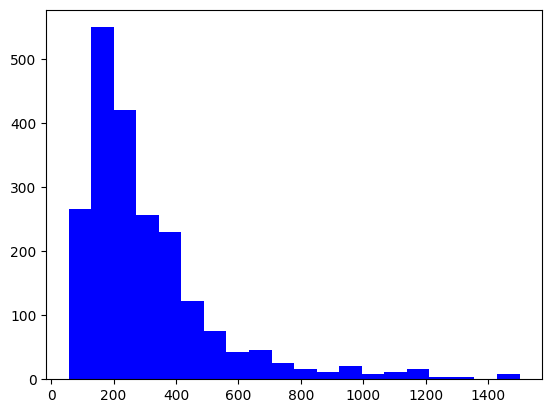

In [91]:
plt.hist( three_brands['Price_EUR'], bins=20, label='Battery_capactiy', color='blue')

Two-way ANOVA results:
                  sum_sq      df           F        PR(>F)
brand       4.251201e+06     2.0   48.809665  1.881468e-21
size        6.309317e+06     1.0  144.879343  2.501591e-32
brand:size  2.861541e+04     2.0    0.328544  7.200075e-01
Residual    9.258468e+07  2126.0         NaN           NaN


(0.0, 2000.0)

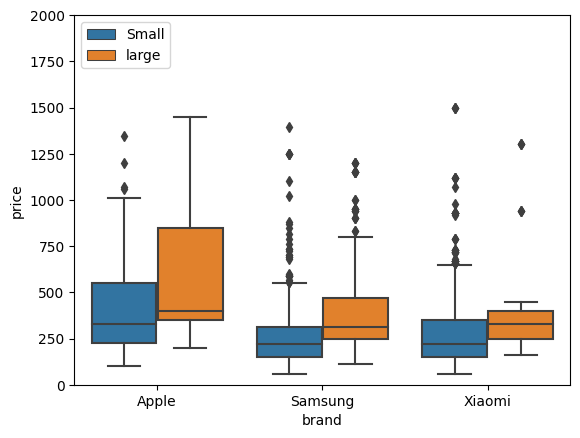

In [92]:
OTANOVA ={"price": three_brands['Price_EUR'], "brand":three_brands['brand'], "size":three_brands['size']}
OTANOVA =  pd.DataFrame(OTANOVA)
model = ols('price ~ brand * size', data=OTANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-way ANOVA results:")
print(anova_table)

ax=sns.boxplot(x='brand', y='price', hue='size', data=OTANOVA)
ax.legend(loc='upper left')
ax.set_ylim([0, 2000])


<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b>نتیجه تحلیل آنوا</b>
</font>
</h2>


Null Hypotheses:

H₀ for "brand": There is no significant difference in the means of the response variable (price) across different categories.

H₀ for "size": There is no significant difference in the means of the response variable (price) between different discount levels.

H₀ for Interaction effect: There is no significant interaction effect between "sim_type" and "size" on the response variable (price).



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium; color:#ff0000"">
<font face="vazir" size=3 color="#ff0000">
با توجه به میزان نتیجه اِف و پی-ولیو‌های کمتر از پنج صدم در هر سه مورد (نوع سیمکارت و سایز) می‌توان گفت که فرض صفر (یعنی عدم وجود تفاوت معنادار بین میانگین میان گروه‌ها) رد می‌شود. به عبارت دیگر می‌توان گفت اندازه گوشی‌ها در هر سه برند سامسونگ شیائومی و اپل بر قیمت گوشی تاثیر دارد. 
</font>
<p>  
                                         
                         

## Hypothesis Testing 6: Weight among different sizes 

small_phones_weight and/or large_phones_weight: Based on normality test this data is not normal. performing U-test on data: 

u_statistics: 991.0 p_value: 0.0 

Reject null hypothesis: Distributions are significantly different.

small_phones_weight and/or large_phones_weight: Trying Boxcox transformation... 

performing t-test on boxcox transformed data to check the u-test validity 

t_statistics: -120.44509051344907 p_value: 0.0 

Reject null hypothesis: Means are significantly different. 



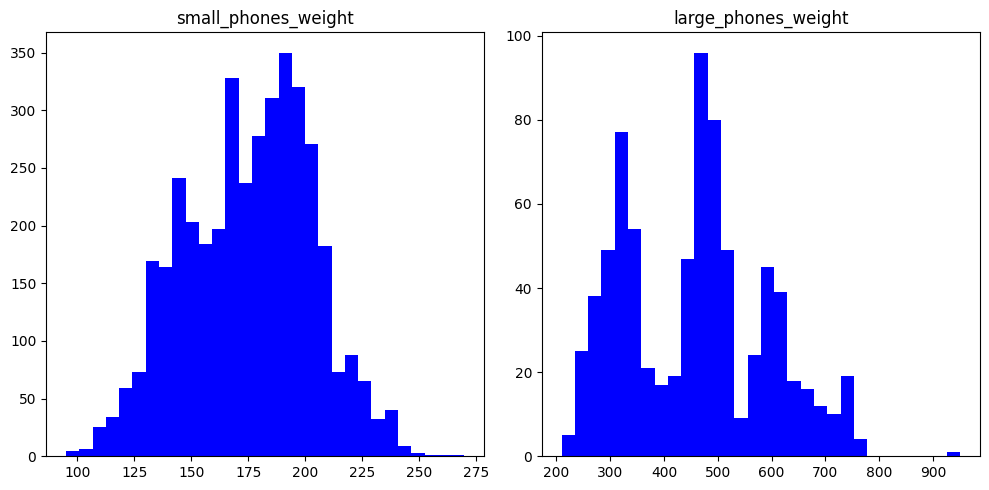

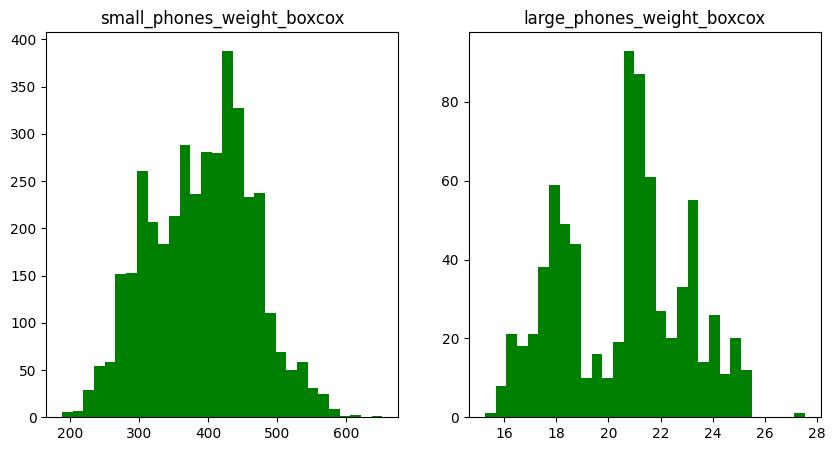

In [95]:
analyzer = Hypothesis_testing(df, 'weight', 'size')
analyzer.perform_hypothesis_test()

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b> تحلیل نتیجه تست فرض  </b>
</font>
</h2>


Ho: M(Weight for Small devices) = M(Weight for Large devices)

H1: M(Weight for Small devices) < M(Weight for Large devices) or M(Weight for Small devices) > M(Weight for Large devices)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تست فرض دوطرفه،‌ ابتدا نرمال بودن داده‌ها توسط تست نرمالیتی شاپیرو بررسی شد. بر اساس نمودار توزیع داده‌ها و اجرای تست نرمالیتی مشخص می‌شود این داده هم نرمال نیست. بنابراین نمی‌توانیم تی-تست بگیریم. یو -تست اجرا شده و نتیجه نشان می‌دهد مقدار پی-ولیو از آلفای پنج‌صدم کمتر است. بنابراین فرض صفر یعنی برابری میانگین وزن در گوشیهای با سایز متفاوت رد می‌شود. از آنجا که داده نرمال نبوده‌است، کلاس تست‌فرض ترنسفرم باکس‌کاکس را هم بر روی داده اجرا می‌کند و با داده به دست آمده از این ترنسفرم تی-تست هم انجام می‌دهد تا نتیجه یو-تست را چک کنیم. نتیجه تی-تست بر داده‌های ترنسفرم شده هم نتیجه یو-تست قبلی را تایید می‌کنند. بنابراین می‌توان گفت گوشی‌های با سایز متفاوت میانگین وزن متقاوتی دارند. اما در ادامه با اجرای تست فرض یک‌طرفه جهت این تفاوت را نیز نشان می‌دهیم.
</font>  
<p>
    
------------------------------------------------------------------------------------------------------------------------

In [96]:
analyzer2 = Hypothesis_testing(df, 'weight', 'size')
analyzer2.separate_groups()

{'small_phones_weight': 0       172.0
 1       190.0
 2       134.0
 3       134.0
 4       194.0
         ...  
 6005    110.0
 6010    126.0
 6011    142.0
 6012    110.0
 6016    151.0
 Name: weight, Length: 3950, dtype: float64,
 'large_phones_weight': 15      475.0
 30      279.0
 31      279.0
 32      279.0
 33      268.0
         ...  
 5598    613.0
 5612    605.0
 5613    605.0
 5853    330.0
 6030    400.0
 Name: weight, Length: 774, dtype: float64}

In [97]:
groups = analyzer2.separate_groups()
group_names = list(groups.keys())
group_a_name = group_names[0]
group_b_name = group_names[1]
group_a_data = groups[group_a_name]
group_b_data = groups[group_b_name]

print(group_a_name,group_b_name)


small_phones_weight large_phones_weight


In [98]:
u_stat, p_value = stats.mannwhitneyu(group_a_data, group_b_data,alternative='less' )

print('u_statistics:',u_stat,'p_value:',p_value)

if p_value < 0.05:
    print("Reject null hypothesis: Distributions are significantly different.")
else:
    print("Fail to reject null hypothesis: No significant difference in distributions.")

u_statistics: 991.0 p_value: 0.0
Reject null hypothesis: Distributions are significantly different.


-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b> تحلیل نتیجه تست فرض  </b>
</font>
</h2>


Ho: M(Weight for Small devices) = M(Weight for Large devices)

H1: M(Weight for Small devices) < M(Weight for Large devices) 

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تست فرض یک طرفه یو-تست اجرا شده و نتیجه نشان می‌دهد مقدار پی-ولیو از آلفای پنج‌صدم کمتر است. بنابراین فرض صفر یعنی برابری میانگین وزن در گوشیهای با سایز متفاوت رد می‌شود. بنابراین می‌توان گفت گوشی‌های با سایز متفاوت میانگین وزن متقاوتی دارند. در این تست فرض یکطرفه فرض اچ-یک را بر کمتر بودن میانگین وزن گوشی‌های کوچکتر قرار داده‌ایم. با رد شدن فرض صفر این فرض تایید می‌شود. نمودار باکس‌پلات زیر هم این نتیجه را نشان می‌دهد. 
</font>  
<p>
    
------------------------------------------------------------------------------------------------------------------------

(0.0, 800.0)

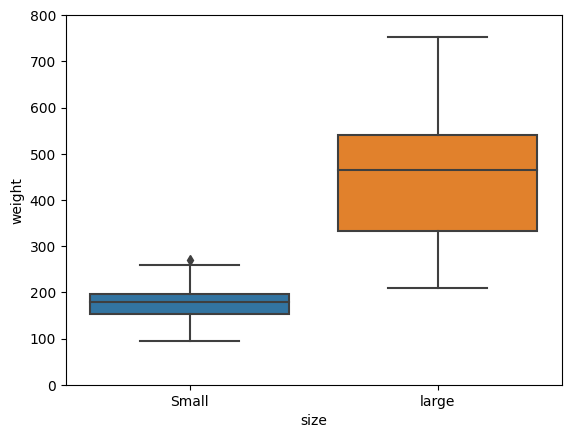

In [100]:
ax=sns.boxplot(x=df['size'],y=df['weight'])
ax.set_ylim([0, 800])

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="#ff0000">
<b> چند بررسی آماری دیگر   </b>
</font>
</h2>

-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="blue">
<b> پیش‌بینی قیمت بر اساس برخی‌از متغیرهای کمی با مدل رگرسیون   </b>
</font>
</h2>

-------------------------------------------------------------------------------------------------------------------

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

X=df[['Battery_capactiy','Display_Size_Inch','weight','Resolution_Pixels','Screen_To_Body_Ratio','PPI_Density']]
y=df['Price_EUR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_with_intercept = sm.add_constant(X)

model = sm.OLS(y, X_with_intercept).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_EUR   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     582.1
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:17:12   Log-Likelihood:                -30887.
No. Observations:                4724   AIC:                         6.179e+04
Df Residuals:                    4717   BIC:                         6.183e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7177 

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="blue">
<b> بررسی اثر نوع پردازنده در ظرفیت باتری   </b>
</font>
</h2>

-------------------------------------------------------------------------------------------------------------------

Two-way ANOVA results:
                sum_sq      df           F         PR(>F)
cpu       2.076018e+09     4.0  203.658337  2.280607e-161
Residual  1.202594e+10  4719.0         NaN            NaN


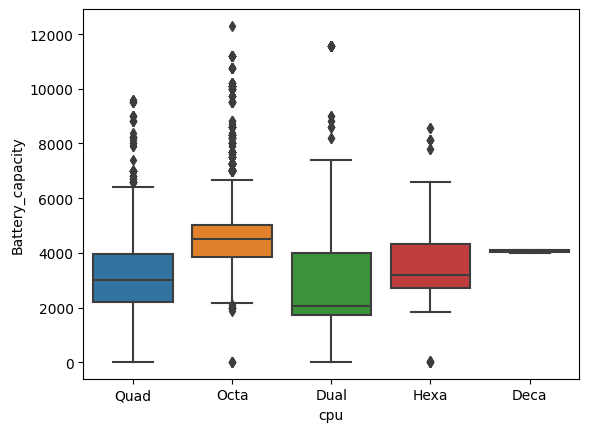

In [106]:
OTANOVA ={"Battery_capacity": df['Battery_capactiy'], "cpu":df['CPU_Core_Count']}
OTANOVA =  pd.DataFrame(OTANOVA)
model = ols('Battery_capacity ~ cpu', data=OTANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-way ANOVA results:")
print(anova_table)

ax=sns.boxplot(x='cpu', y='Battery_capacity', data=OTANOVA)
#ax.legend(loc='upper left')
#ax.set_ylim([0, 2000])

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="blue">
<b> بررسی اثر سازنده چیپ‌ست بر قیمت   </b>
</font>
</h2>

-------------------------------------------------------------------------------------------------------------------

One-way ANOVA results:
                            sum_sq      df          F         PR(>F)
Chipset_Manufacturer  2.913680e+07     5.0  136.89906  6.261148e-136
Residual              2.008304e+08  4718.0        NaN            NaN


(0.0, 1200.0)

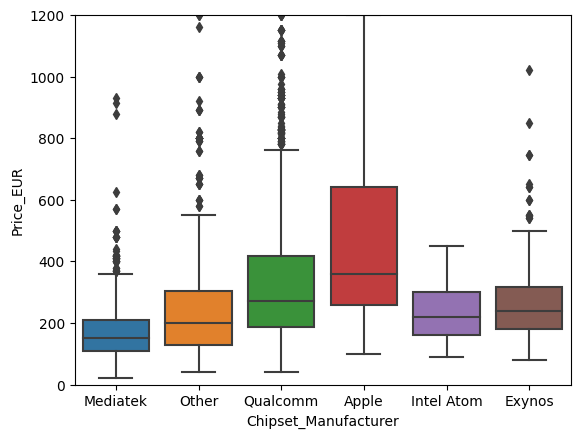

In [113]:
OTANOVA ={"Price_EUR": df['Price_EUR'], "Chipset_Manufacturer":df['Chipset_Manufacturer']}
OTANOVA =  pd.DataFrame(OTANOVA)
model = ols('Price_EUR ~ Chipset_Manufacturer', data=OTANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

ax=sns.boxplot(x='Chipset_Manufacturer', y='Price_EUR', data=OTANOVA)
#ax.legend(loc='upper left')
ax.set_ylim([0, 1200])

-------------------------------------------------------------------------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#ff0000">
<font face="vazir" color="blue">
<b> بررسی اثر تعداد دوربین‌های اصلی بر قیمت   </b>
</font>
</h2>

-------------------------------------------------------------------------------------------------------------------

C:\Users\HP\AppData\Local\Temp\ipykernel_3372\755260405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_cam_num']=df['Number of main cameras']


One-way ANOVA results:
                    sum_sq      df           F        PR(>F)
main_cam_num  1.245045e+07     1.0  270.282789  4.203284e-59
Residual      2.175167e+08  4722.0         NaN           NaN


(0.0, 1200.0)

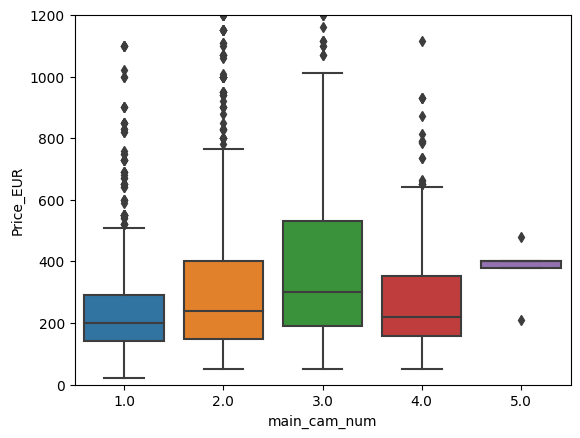

In [115]:
df['main_cam_num']=df['Number of main cameras']

OTANOVA ={"Price_EUR": df['Price_EUR'], "main_cam_num":df['main_cam_num']}
OTANOVA =  pd.DataFrame(OTANOVA)
model = ols("Price_EUR ~ main_cam_num", data=OTANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

ax=sns.boxplot(x='main_cam_num', y='Price_EUR', data=OTANOVA)
#ax.legend(loc='upper left')
ax.set_ylim([0, 1200])